# Тестовое задание на позицию “Аналитик данных”

## Задание

Имеется набор данных. Необходимо проанализировать его и представить ответы на вопросы с визуализацией каждого пункта.

DATA: https://docs.google.com/spreadsheets/d/1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs/edit?usp=sharing
 

**Описание данных** 

* ID — Уникальный идентификатор заказа.
* Order Date — Дата заказа в формате ДД/ММ/ГГГГ.
* Class — Класс заказа (например, "Стандарт").
* Region — Регион, в котором был осуществлён заказ (например, "Урал", "Владивосток").
* Sub-Category — Подкатегория товара (например, "Appliances", "Bookcases", "Phones").
* Sales — Сумма продаж (значение представлено с разделителем в виде запятой).

## Импорт необходимых библиотек

In [28]:
import requests
import warnings
import pandas as pd
from io import BytesIO
import matplotlib.pyplot as plt

## Создание методов для работы

**Метод для присвоения группы продаж**

In [42]:
def assign_sale_group(sale):
    if sale <= sales_quantiles[0.33]:
        return 'Маленькие'
    elif sale <= sales_quantiles[0.66]:
        return 'Средние'
    else:
        return 'Большие'

### Задание 1

Описание задачи:

1) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?
2) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?
3) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?


Сделать вывод на основе полученных результатов.

#### 1. Загрузка данных

**Откроем файл и посмотрим на данные**

In [29]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs/export?format=xlsx'

response = requests.get(sheet_url)

file_data = BytesIO(response.content)

df = pd.read_excel(file_data)

print('Первые 5 строк датасета')
display(df.head())
print('\n', 'Общая информация о датасете')
df.info()

Первые 5 строк датасета


,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.00
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13



 Общая информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            9800 non-null   int64         
 1   Order Date    9800 non-null   datetime64[ns]
 2   Class         9800 non-null   object        
 3   Region        9800 non-null   object        
 4   Sub-Category  9800 non-null   object        
 5   Sales         9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 459.5+ KB


Полнота данных:

Все 9800 строк в каждом столбце имеют ненулевые значения, что указывает на отсутствие пропущенных данных.

**Изменение названий столбцов**

Для более удобной работы изменим названия столбцов.

In [30]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')

df.columns

Index(['id', 'order_date', 'class', 'region', 'sub_category', 'sales'], dtype='object')

#### 2. Исследовательский анализ данных

**Определение подгрупп товаров, наиболее часто покупаемых, за все время продаж**

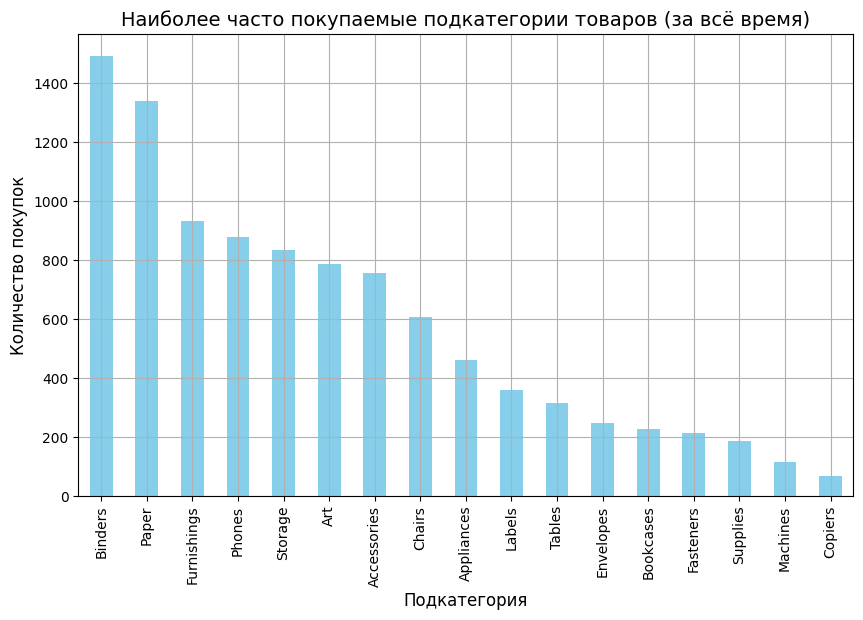

In [31]:
# Подсчёт количества покупок по подкатегориям
most_purchased_all_time = df['sub_category'].value_counts()

# Построение графика
plt.figure(figsize=(10, 6))
bars = most_purchased_all_time.plot(kind='bar', color='skyblue')

# Добавление заголовков и меток осей
plt.title('Наиболее часто покупаемые подкатегории товаров (за всё время)', fontsize=14)
plt.xlabel('Подкатегория', fontsize=12)
plt.ylabel('Количество покупок', fontsize=12)
plt.grid(True)

По графику видно, что наиболее часто покупаемые подкатегории товаров за всё время — это:

1) Binders (Папки)
2) Paper (Бумага)
3) Furnishings (Мебель)
4) Phones (Телефоны)

Эти подкатегории лидируют по количеству покупок.

**Определение подгрупп товаров, наиболее часто покупаемых, за последние два года**

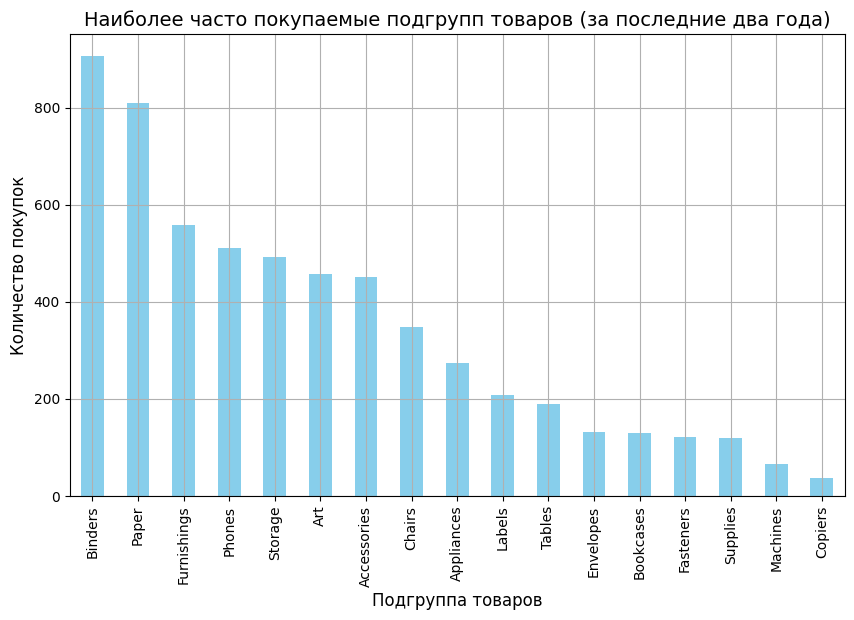

In [32]:
max_date = df['order_date'].max()
two_years_ago = max_date - pd.DateOffset(years=2)

recent_data = df[df['order_date'] >= two_years_ago]

top_sub_categories = recent_data['sub_category'].value_counts()

plt.figure(figsize=(10, 6))
top_sub_categories.plot(kind='bar', color='skyblue')

plt.title('Наиболее часто покупаемые подгрупп товаров (за последние два года)', fontsize=14)
plt.xlabel('Подгруппа товаров', fontsize=12)
plt.ylabel('Количество покупок', fontsize=12)
plt.grid(True)

По графику видно, что за последние два года наиболее часто покупаемые подгруппы товаров включают:

1) Binders (Папки) — они занимают лидирующую позицию, что может указывать на их высокую востребованность для организации документов.
2) Paper (Бумага) — бумага также широко востребована, следуя сразу за папками.
3) Furnishings (Мебель для офиса) и Phones (Телефоны) занимают средние позиции.

**Определение подгрупп товаров, наиболее часто покупаемых, за последний год**

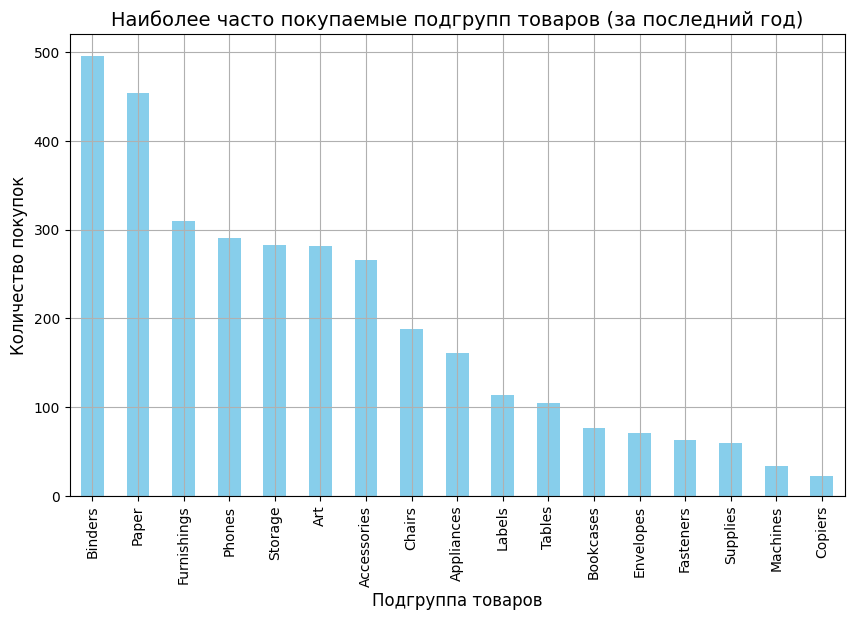

In [33]:
year_ago = max_date - pd.DateOffset(years=1)

recent_data = df[df['order_date'] >= year_ago]

top_sub_categories = recent_data['sub_category'].value_counts()

plt.figure(figsize=(10, 6))
top_sub_categories.plot(kind='bar', color='skyblue')

plt.title('Наиболее часто покупаемые подгрупп товаров (за последний год)', fontsize=14)
plt.xlabel('Подгруппа товаров', fontsize=12)
plt.ylabel('Количество покупок', fontsize=12)
plt.grid(True)

#### Промежуточный вывод

Независимо от временного диапазона, наиболее популярными категориями остаются Binders и Paper, что указывает на их устойчивую востребованность. Другие категории, такие как Furnishings, Phones, и Storage, также показывают стабильные результаты.

### Задание 2

Описание задачи:

Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).

Можно использовать правило трех сигм. Однако любые другие решения приветствуются.

**Посмотрим на статистические данные с помощью метода describe()**

In [50]:
df['sales'].describe()

count     9800.000000
mean     22921.757737
std      12601.999815
min       1002.794000
25%      12135.625000
50%      22882.060000
75%      33730.130000
max      44995.410000
Name: sales, dtype: float64

**Построение графика boxplot**

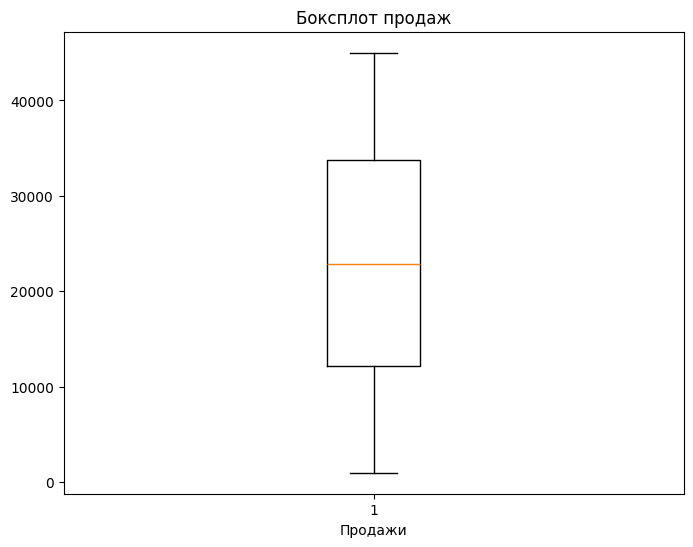

In [51]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['sales'])
plt.title('Боксплот продаж')
plt.xlabel('Продажи')
plt.show()

**Поиск аномалий с помощью метода межквартильного диапазона (IQR)**


In [52]:
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1

# Границы для аномалий: 1.5 * IQR ниже Q1 и выше Q3
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

# Определим, сколько значений выходит за эти границы
outliers = df[(df['sales'] < lower_bound_iqr) | (df['sales'] > upper_bound_iqr)]

outliers_count = outliers.shape[0]
outliers.head(), outliers_count

(Empty DataFrame
 Columns: [id, order_date, class, region, sub_category, sales, sale_group]
 Index: [],
 0)

#### Промежуточный вывод

Проведенный анализ показал, что в данных нет аномалий согласно методу межквартильного диапазона (IQR). То есть, все значения продаж находятся в пределах допустимого диапазона, и выбивающихся значений, которые следовало бы рассматривать как аномалии, не обнаружено.

### Задание 3

In [54]:
# Определим квантильные значения для разделения продаж на группы (маленькие, средние, большие)
sales_quantiles = df['sales'].quantile([0.33, 0.66])

df['sale_group'] = df['sales'].apply(assign_sale_group)

# Сгруппируем данные по регионам и группам продаж, подсчитывая количество покупок
sales_grouped_by_region = df.groupby(['region', 'sale_group']).size().unstack(fill_value=0)

sales_grouped_by_region

sale_group,Большие,Маленькие,Средние
region,,,
Владивосток,975,933,877
Калиниград,1031,1027,1082
Москва,553,516,529
Урал,773,758,746


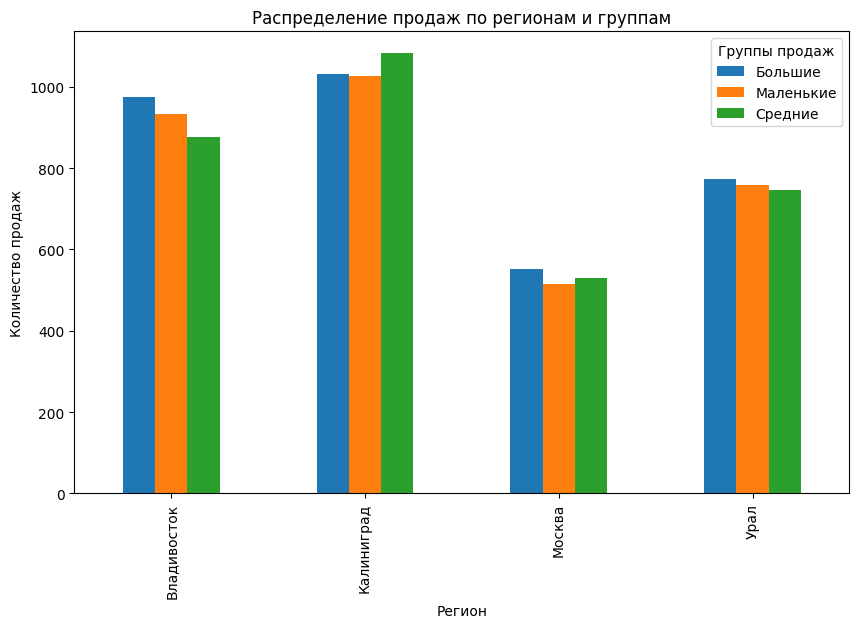

In [61]:
sales_grouped_by_region.plot(kind='bar', figsize=(10, 6))

plt.title('Распределение продаж по регионам и группам')
plt.xlabel('Регион')
plt.ylabel('Количество продаж')
plt.legend(title='Группы продаж')
plt.show()

На основе сводной таблицы по регионам и группам продаж можно выделить следующие тенденции и паттерны:

**1. Основные тенденции:**
* Калининград:

Самый сбалансированный регион по продажам, где объемы в каждой из групп (маленькие, средние и большие) практически равны. Это говорит о том, что все типы товаров (вне зависимости от цены) одинаково востребованы в этом регионе.

* Владивосток:

В этом регионе преобладают большие продажи, что может указывать на спрос на более дорогие товары. Здесь есть тенденция к покупке товаров с высоким значением продаж.

* Москва:

В Москве наблюдается почти равномерное распределение между всеми группами, что говорит о более универсальном спросе на товары всех категорий (маленькие, средние и большие продажи).

* Урал:

В Урале также больше покупают товары из категории "Большие", хотя разница между группами не столь значительная.


**Наиболее прибыльная группа:**

Во всех регионах, за исключением Москвы, наиболее прибыльной группой являются "Большие продажи". Это можно определить на основе того, что в этой группе наблюдается наибольшее количество покупок, что, в свою очередь, увеличивает общий объем продаж.

#### Промежуточный вывод

Большие продажи являются ключевым драйвером прибыли, особенно в регионах Владивосток, Калининград и Урал.
В Москве наблюдается относительно равномерное распределение между всеми группами, что говорит о том, что покупатели здесь предпочитают товары всех категорий в равной степени.

### Общий вывод

Проведенный анализ продаж показал несколько ключевых тенденций, которые могут помочь в дальнейшей оптимизации стратегии продаж и маркетинга.

**1) Популярные категории товаров:**

Независимо от временного диапазона, подкатегории Binders и Paper остаются самыми популярными.

**2) Анализ аномалий:**

Данные о продажах не содержат аномалий, что указывает на стабильность и точность ведения учета. Все значения продаж находятся в пределах нормального распределения.

**3) Тенденции по регионам и группам продаж:**

"Большие продажи" являются наиболее прибыльными в таких регионах, как Владивосток, Калининград и Урал, где дорогие товары пользуются наибольшим спросом. В Москве наблюдается более равномерное распределение покупок по всем категориям.

**Дополнительные рекомендации:**

Следует разработать персонализированные стратегии для каждого региона на основе выявленных данных. В некоторых регионах можно сделать упор на эксклюзивные предложения для клиентов, предпочитающих дорогие товары, тогда как в других может быть эффективной стратегия, направленная на массовый рынок.